In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [62]:
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data.csv


In [63]:
crime_df = pd.read_csv("crime_data.csv")


In [64]:
crime_df.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)

In [65]:
crime_df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [66]:
crime_df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [67]:
crime_df.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

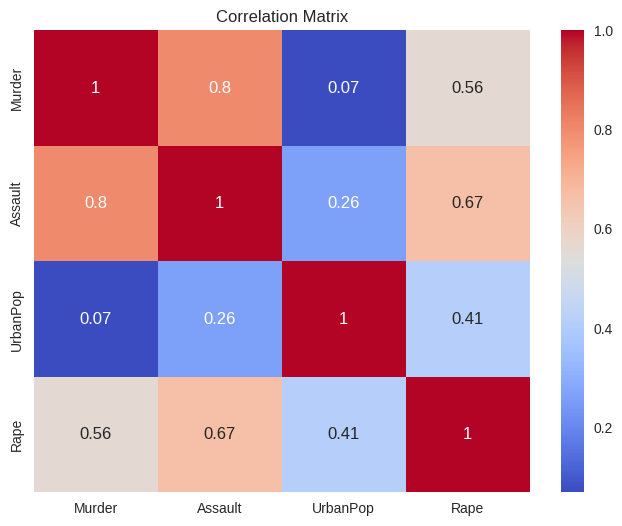

In [68]:
# Create the correlation matrix
corr_matrix = crime_df.iloc[:, 1:].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [69]:
# Standardize the data
scaler = StandardScaler()
crime_scaled = scaler.fit_transform(crime_df.iloc[:, 1:])
crime_scaled = pd.DataFrame(crime_scaled, columns=crime_df.columns[1:])

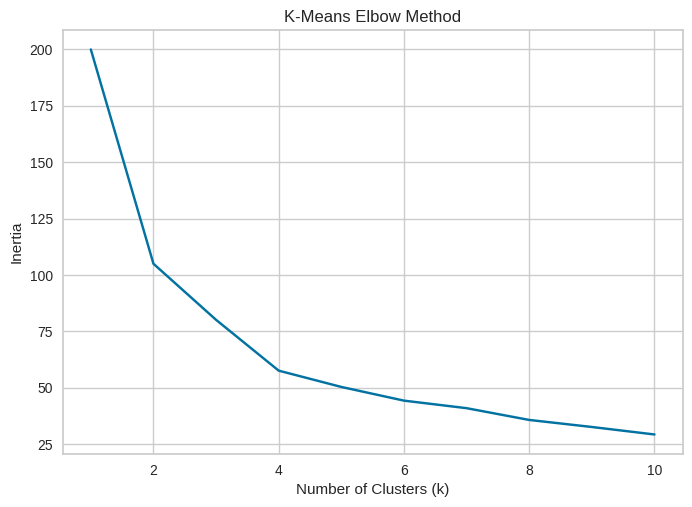

In [70]:
# K-Means Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(crime_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('K-Means Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

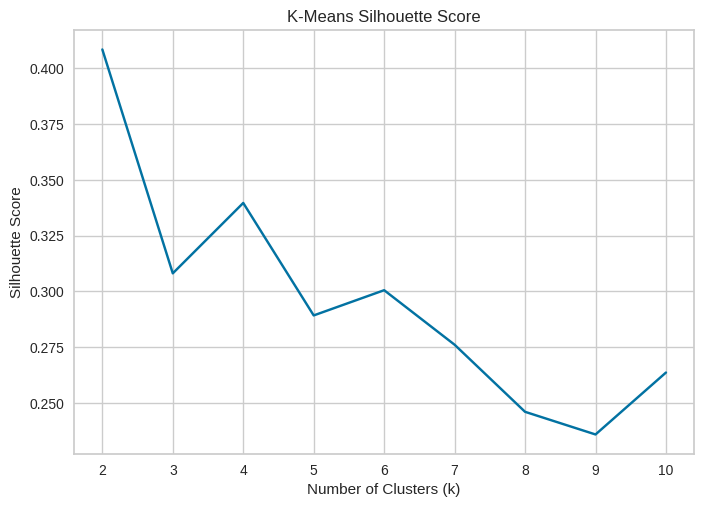

In [71]:
# K-Means Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(crime_scaled)
    silhouette_scores.append(silhouette_score(crime_scaled, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.title('K-Means Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


In [72]:
# K-Means Clustering
kmeans_cluster = KMeans(n_clusters=3, random_state=42)
crime_df['KMeans_Cluster'] = kmeans_cluster.fit_predict(crime_scaled)

# Number of samples in each cluster
print(crime_df['KMeans_Cluster'].value_counts())

1    20
0    16
2    14
Name: KMeans_Cluster, dtype: int64


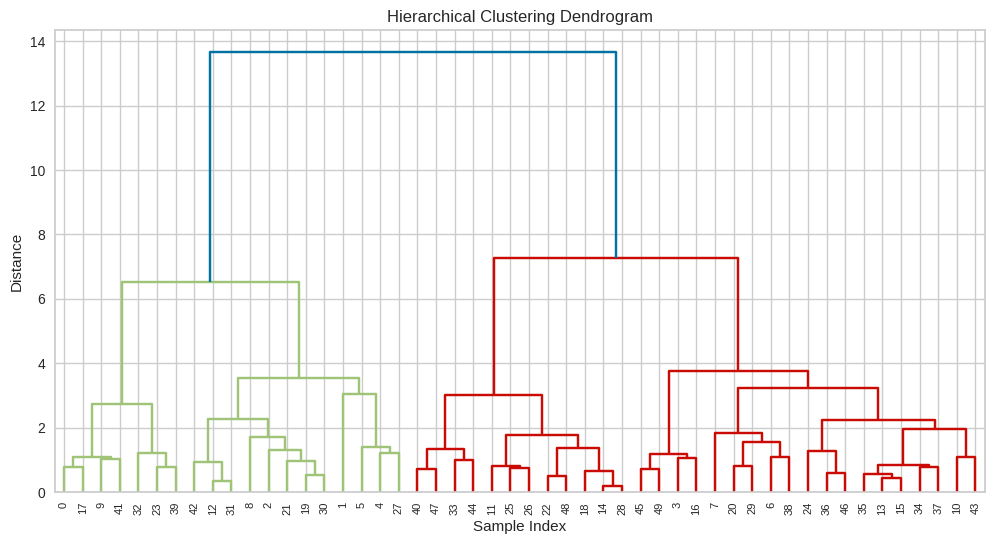

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical Clustering Dendrogram
linkage_matrix = linkage(crime_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [74]:
# Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
crime_df['Agg_Cluster'] = agg_cluster.fit_predict(crime_scaled)

# Number of samples in each cluster
print(crime_df['Agg_Cluster'].value_counts())

0    19
1    19
2    12
Name: Agg_Cluster, dtype: int64


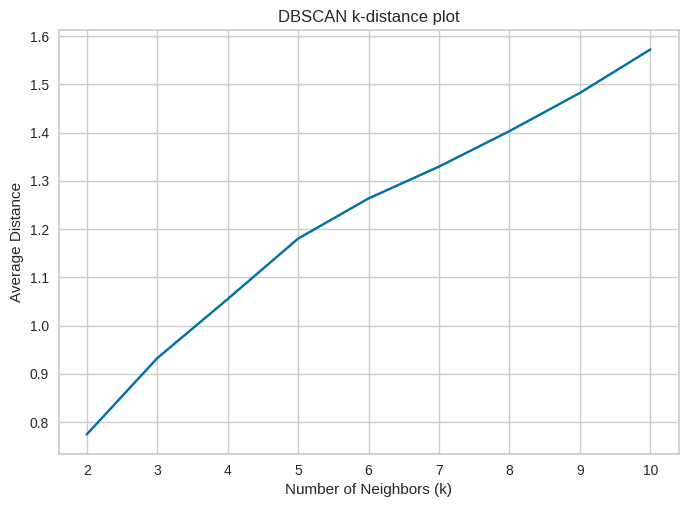

In [75]:
from sklearn.neighbors import NearestNeighbors

# DBSCAN k-distance plot
k_dist = []
for k in range(2, 11):
    neigh = NearestNeighbors(n_neighbors=k)
    neighbors = neigh.fit(crime_scaled)
    distances, _ = neighbors.kneighbors(crime_scaled)
    avg_distance = np.mean(distances[:, -1])
    k_dist.append(avg_distance)

plt.plot(range(2, 11), k_dist)
plt.title('DBSCAN k-distance plot')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Distance')
plt.show()

In [76]:
# DBSCAN Clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=4)
crime_df['DBSCAN_Cluster'] = dbscan_cluster.fit_predict(crime_scaled)

# Number of samples in each cluster
print(crime_df['DBSCAN_Cluster'].value_counts())

 1    28
-1    18
 0     4
Name: DBSCAN_Cluster, dtype: int64


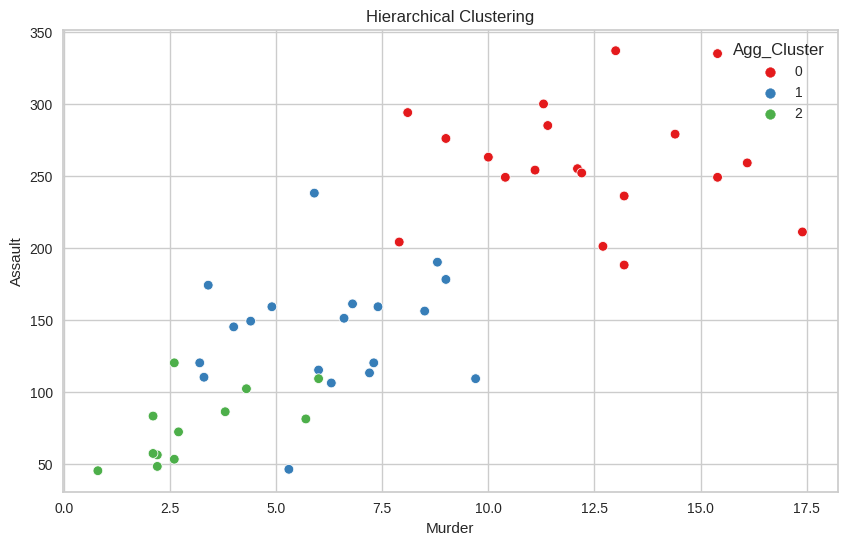

In [77]:
# Scatter plot of the first two principal components with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Murder', y='Assault', hue='Agg_Cluster', data=crime_df, palette='Set1')
plt.title('Hierarchical Clustering')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

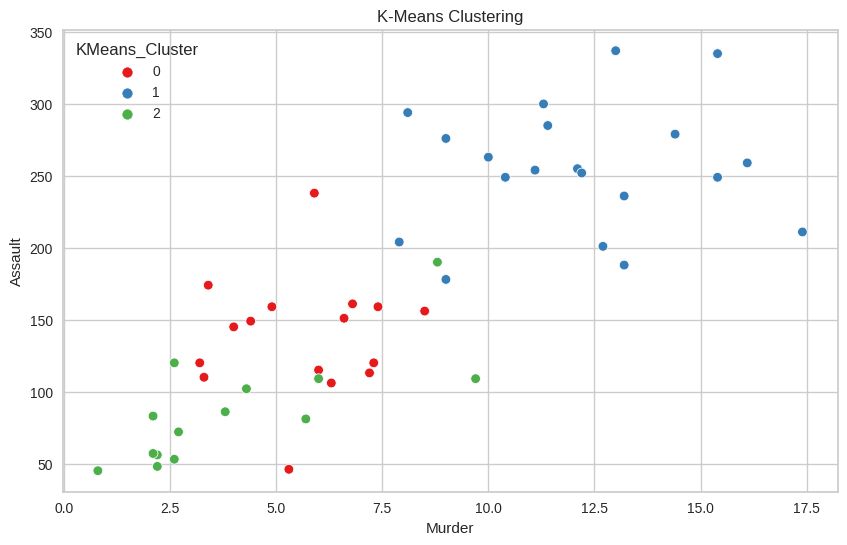

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Murder', y='Assault', hue='KMeans_Cluster', data=crime_df, palette='Set1')
plt.title('K-Means Clustering')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()


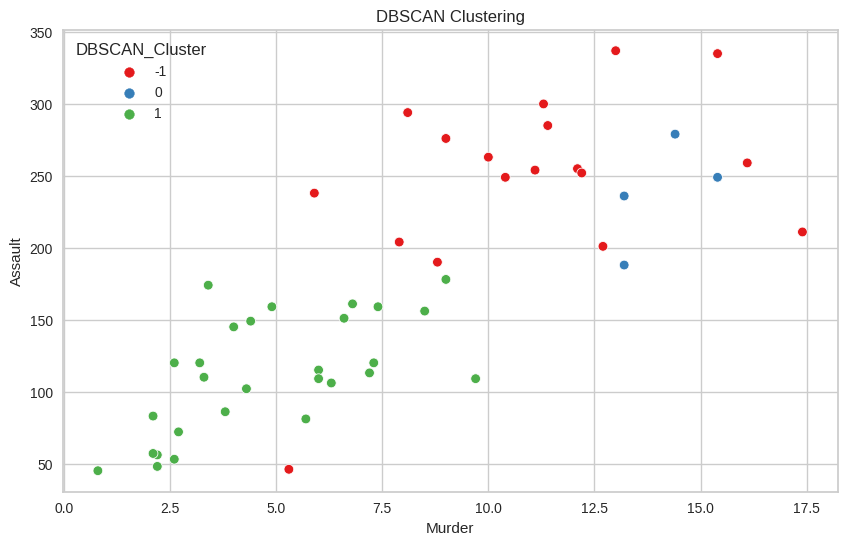

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Murder', y='Assault', hue='DBSCAN_Cluster', data=crime_df, palette='Set1')
plt.title('DBSCAN Clustering')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

In [80]:
# Silhouette scores
print("Silhouette Score for Hierarchical Clustering:", silhouette_score(crime_scaled, crime_df['Agg_Cluster']))
print("Silhouette Score for K-Means Clustering:", silhouette_score(crime_scaled, crime_df['KMeans_Cluster']))
print("Silhouette Score for DBSCAN Clustering:", silhouette_score(crime_scaled, crime_df['DBSCAN_Cluster']))

Silhouette Score for Hierarchical Clustering: 0.31036358174027895
Silhouette Score for K-Means Clustering: 0.30813622648945616
Silhouette Score for DBSCAN Clustering: 0.2051154919322


In [81]:
#q2

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples


In [83]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (1).xlsx


In [86]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [87]:
data.rename({'ID#':'id'}, axis=1, inplace=True)

In [88]:
data.describe()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [89]:
data.isnull().sum()

id                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [91]:

#Set ID as Index Column
data=data.iloc[:,1:]
data.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [92]:
# null/missing
null_count_col = data.isnull().sum().value_counts(ascending=False)
print("Null Count for Columns:", null_count_col)

Null Count for Columns: 0    11
dtype: int64


In [93]:
# null count for obeservations/rows
null_count_row = data.isnull().sum(axis=1).value_counts(ascending=False)
print("Null Count for Rows:", null_count_row)

Null Count for Rows: 0    3999
dtype: int64


conclusion : no null feature neither null oberservation is recorded

In [94]:
#DUPLICATES
data.duplicated().sum()

1

In [95]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [96]:
data.loc[3897:3900,:]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3897,179832,2954,3,1,1,18218,20,2500,5,1569,1
3898,44324,0,1,1,1,650,4,650,4,1583,0
3899,90666,0,4,1,1,32474,14,0,0,1582,0
3900,10741,0,1,1,1,6593,8,1108,2,1579,1


In [97]:
data.drop_duplicates(inplace=True)

In [98]:
data.duplicated().sum()
data.reset_index(inplace=True)

conclusion : 1 duplicate observation , hence dropped and index reset

In [99]:
data.describe()

,index,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3998.000000,3.998000e+03,3998.000000,3998.00000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,1998.530515,7.361949e+04,144.150575,2.05978,1.014507,1.012256,17149.134567,11.604802,460.170835,1.373937,4119.190095,0.370435
std,1154.318776,1.007817e+05,773.757220,1.37699,0.147669,0.195265,24152.465996,9.603258,1400.365407,3.793585,2065.007629,0.482982
min,0.000000,0.000000e+00,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,999.250000,1.853425e+04,0.000000,1.00000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2331.250000,0.000000
50%,1998.500000,4.313800e+04,0.000000,1.00000,1.000000,1.000000,7183.000000,12.000000,0.000000,0.000000,4097.500000,0.000000
75%,2997.750000,9.240500e+04,0.000000,3.00000,1.000000,1.000000,23810.750000,17.000000,313.500000,1.000000,5790.750000,1.000000
max,3998.000000,1.704838e+06,11148.000000,5.00000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


In [100]:
data.rename(columns={ 'Award?':'Award'}, inplace=True)

In [101]:
data.columns

Index(['index', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

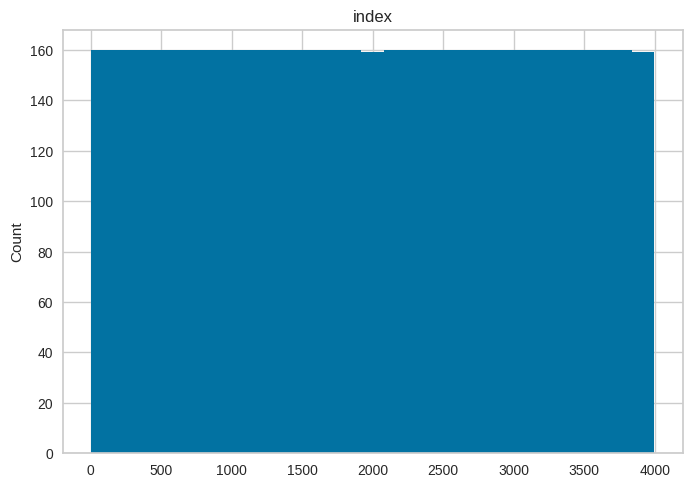

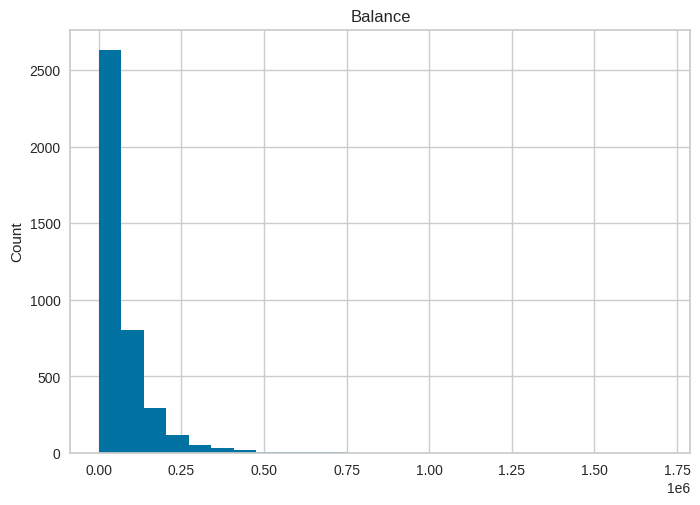

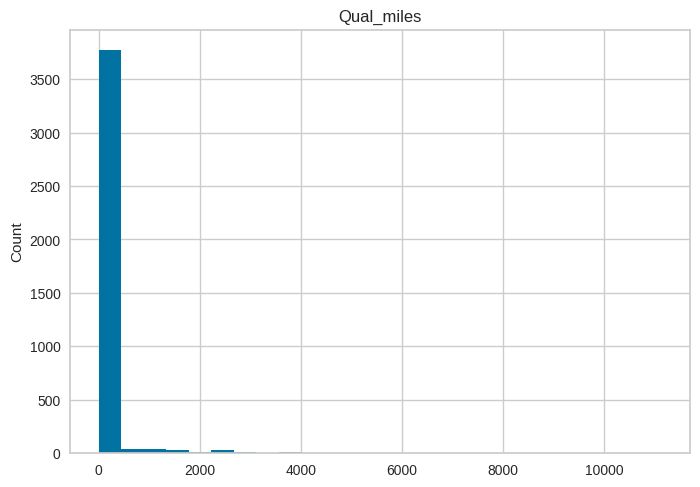

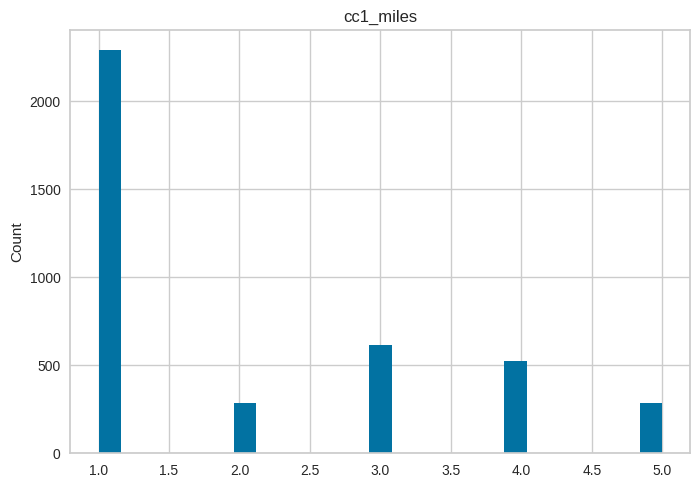

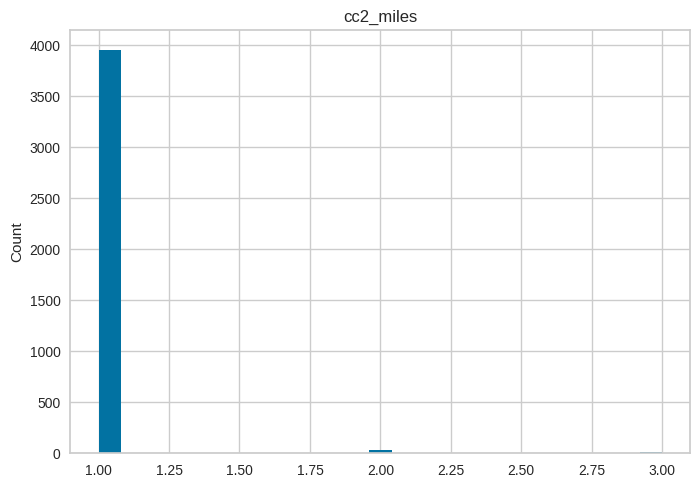

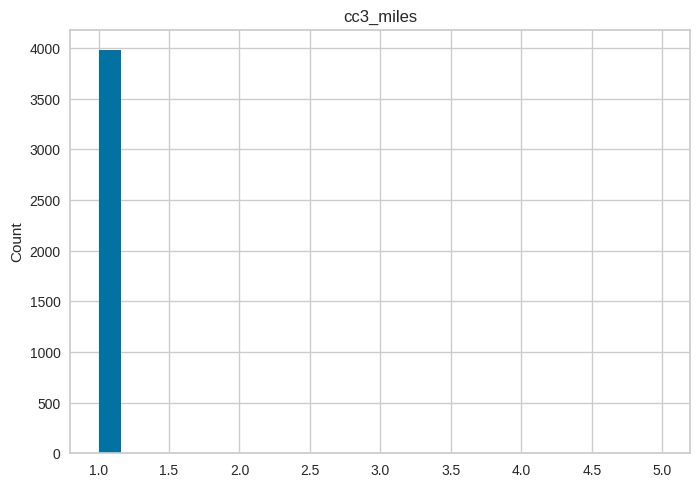

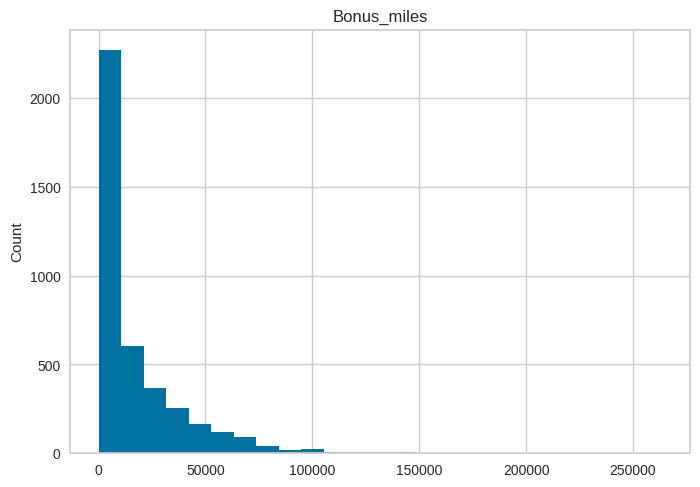

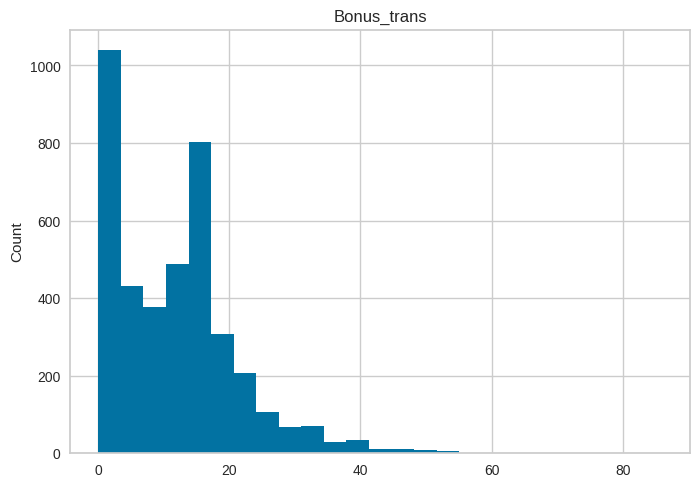

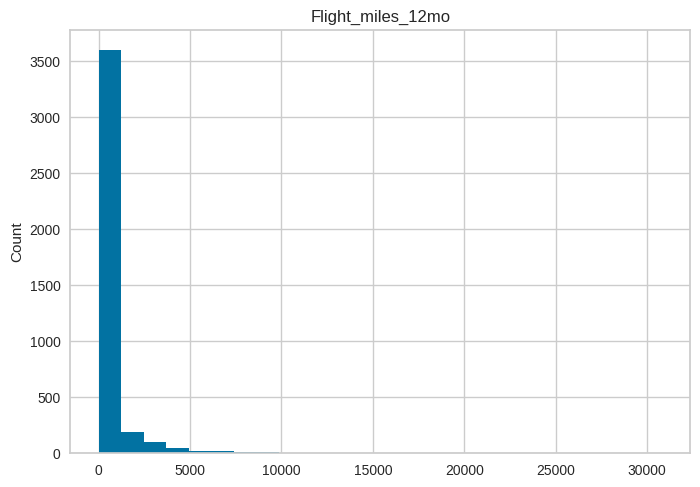

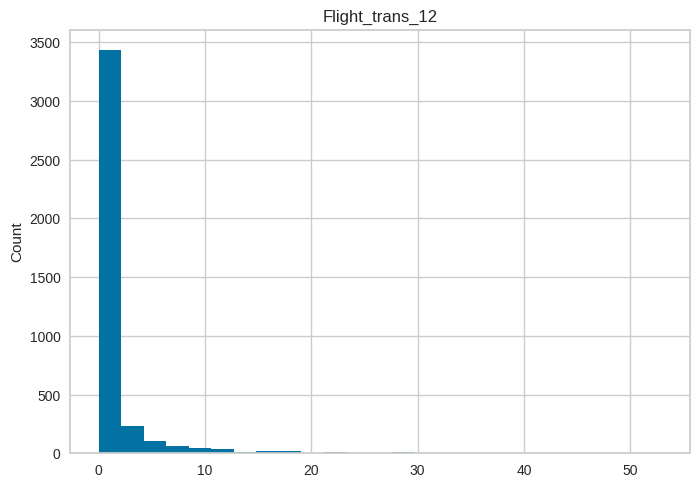

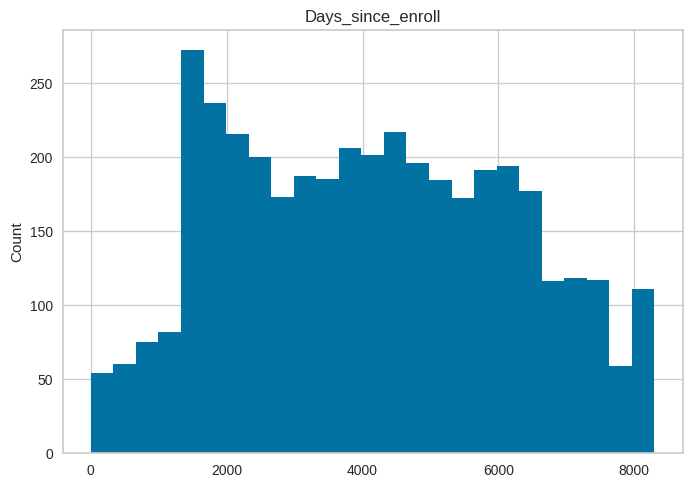

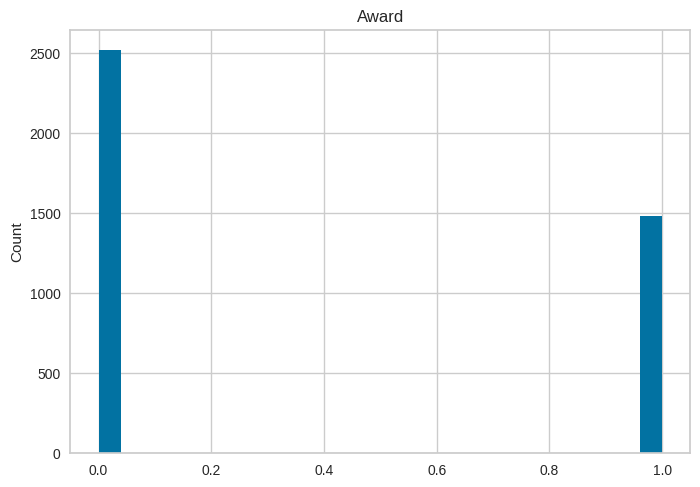

In [102]:
for i in data.columns:
  if i!='ID':
    data[i].hist(bins=25)
    plt.ylabel('Count')
    plt.title(i)
    plt.show()

CONCLUSION:

since most of feature are not normal distribusted , hence we cant use GAUSSIAN MIX MODEL FOR CLUSTERING

and go ahead with KMEAN , DBSCAN AND HIRERACY

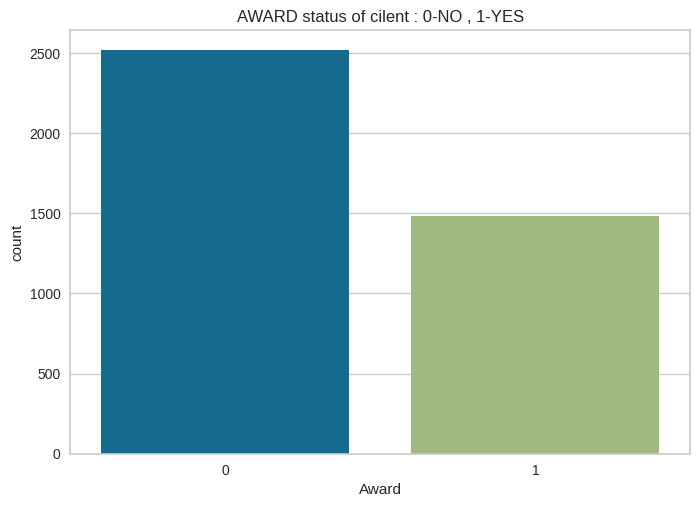

In [103]:
#AWARD
sns.countplot(x='Award', data=data,order=data['Award'].value_counts().index)
plt.title('AWARD status of cilent : 0-NO , 1-YES')
plt.show()

In [104]:
a = len(data[data.Award == 0])
b = len(data[data.Award == 1])
print("Percentage of Customer doesn't have a Award = {:.2f}%".format((a/ (len(data.Award))*100)))
print("Percentage of Customer does have a Award = {:.2f}%".format((b / (len(data.Award))*100)))

Percentage of Customer doesn't have a Award = 62.96%
Percentage of Customer does have a Award = 37.04%


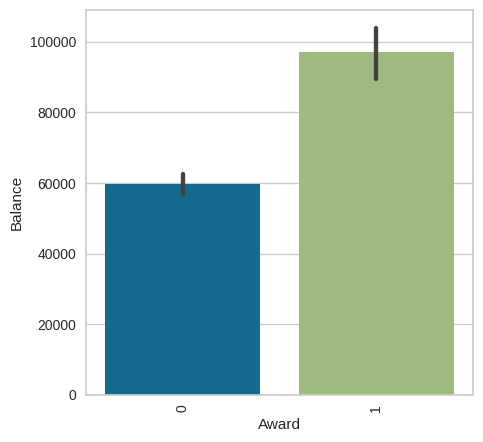

In [105]:
plt.figure(figsize = (5,5))
dtemp = data[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data=dtemp)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

conclusion : yes its true that people with more balance have award

therefore testing correlation with respect to balance



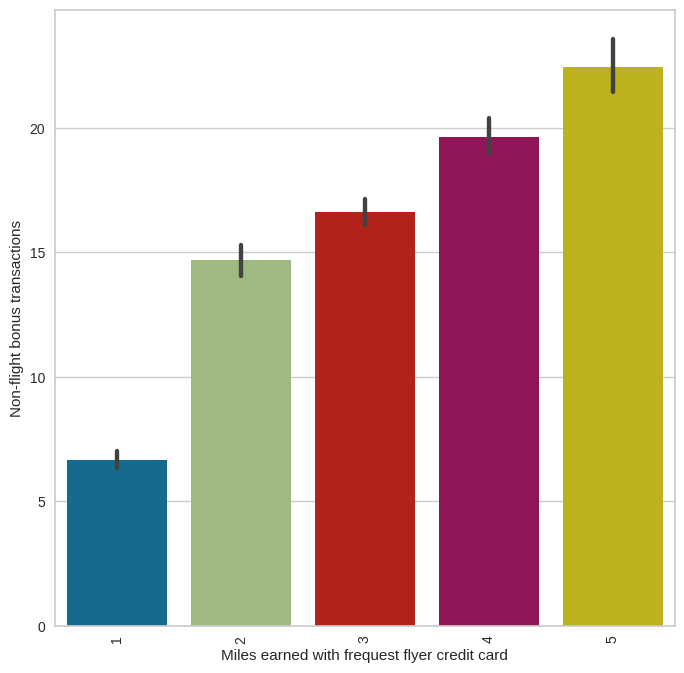

In [106]:

# Plotting frequent flying bonuses vs. non-flight bonus transactions
plt.figure(figsize = (8,8))

#let temp dataframe
dtemp = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)

#ploting
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= dtemp)
ax.set(xlabel = 'Miles earned with frequest flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

CORRELATION ANLAYSIS

In [107]:
data.corr()

,index,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
index,1.000000,-0.243503,-0.019337,-0.224308,0.020345,-0.014716,-0.202816,-0.146531,-0.030877,-0.051954,-0.964883,-0.177697
Balance,-0.243503,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qual_miles,-0.019337,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,-0.224308,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,0.020345,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,-0.014716,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,-0.202816,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,-0.146531,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles_12mo,-0.030877,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans_12,-0.051954,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862


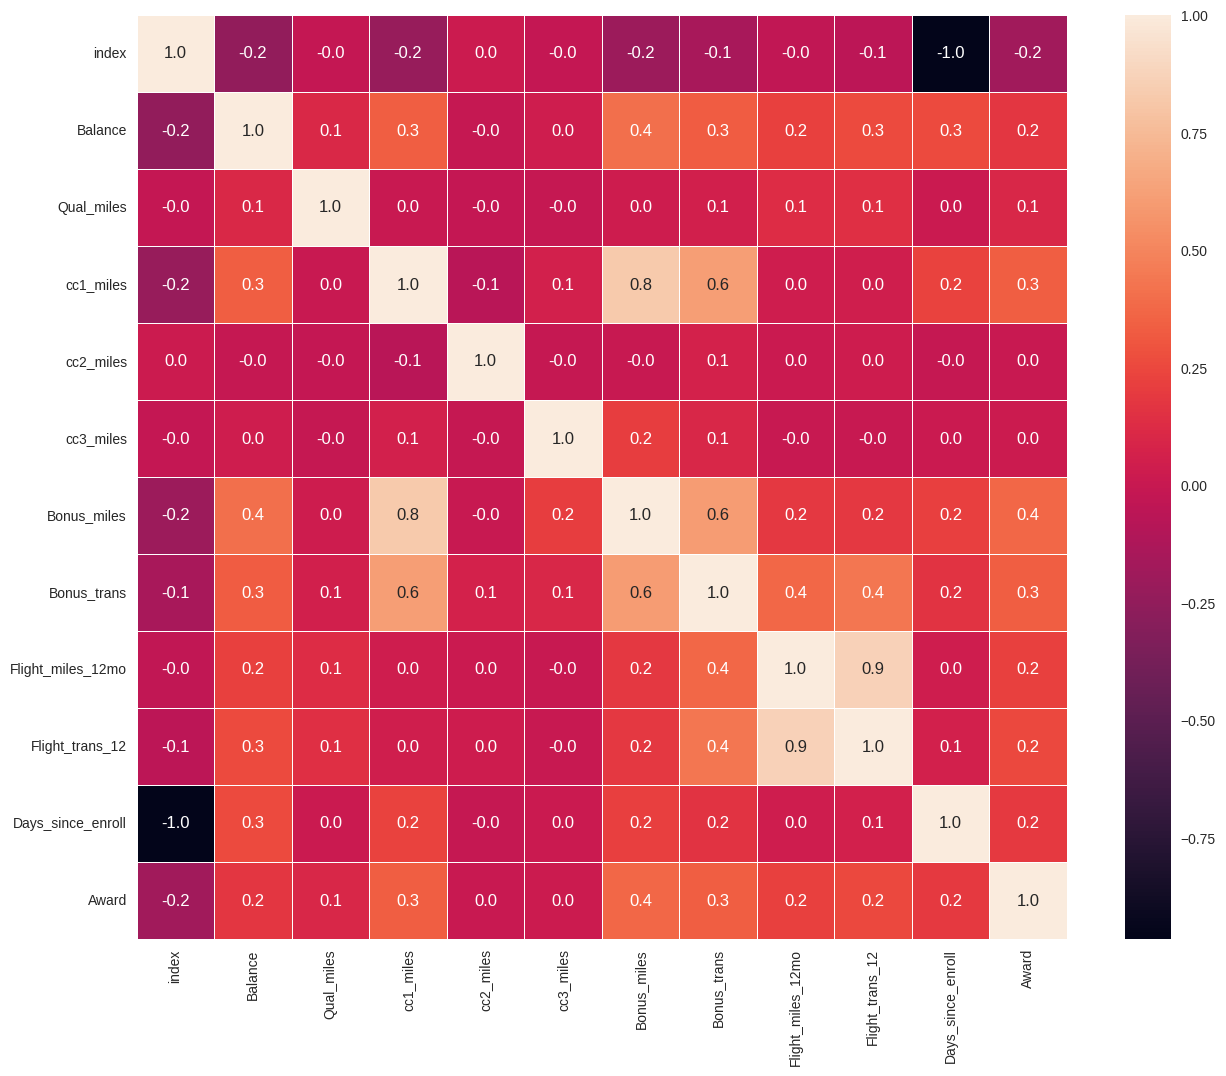

In [108]:
#Visualizing corr with heatmap

f,ax = plt.subplots(figsize=(15,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

Data processing

In [109]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#Minmax scaler
minmax = MinMaxScaler()
minmax_df = minmax.fit_transform(data)
minmax_df.shape

(3998, 12)

In [110]:
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import euclidean_distances, silhouette_score

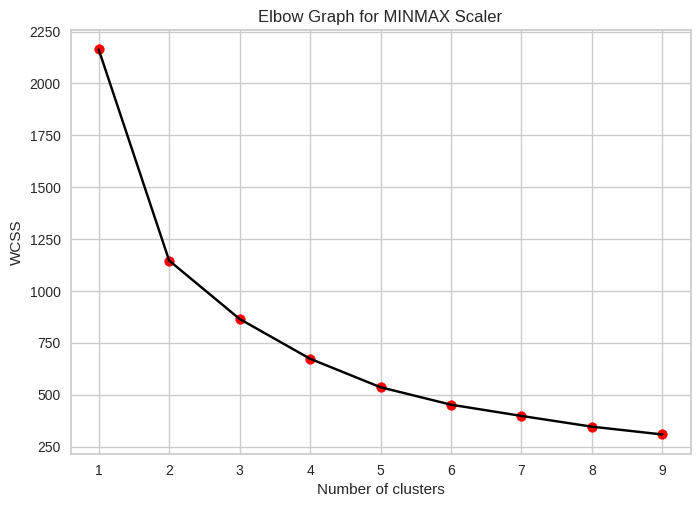

In [111]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,10),wcss,color = 'black')
plt.scatter(range(1,10),wcss,color='red')
plt.title('Elbow Graph for MINMAX Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

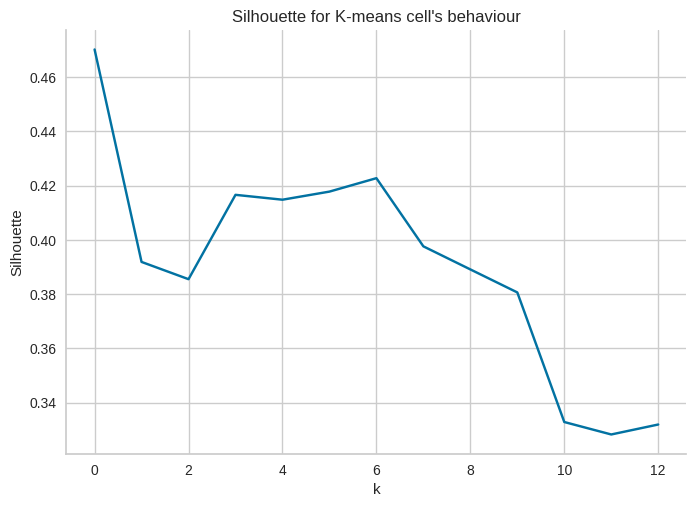

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

s = []
for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(minmax_df)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    s.append(silhouette_score(minmax_df, labels, metric='euclidean'))

plt.plot(s)
plt.ylabel("Silhouette")
plt.xlabel("k")
plt.title("Silhouette for K-means cell's behaviour")
sns.despine()

Building KMeans Cluster algorithm using K=4 and MINMAX Scaler Applied



In [117]:
model_kmeans2 = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans2 = model_kmeans2.fit_predict(minmax_df)
y_predict_kmeans2.shape

(3998,)

In [118]:
#model analysis
y_predict_kmeans2

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [119]:
df_minmax=data.copy()
df_minmax['Kmeans_label'] = model_kmeans2.labels_
df_minmax.head()

,index,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label
0,0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


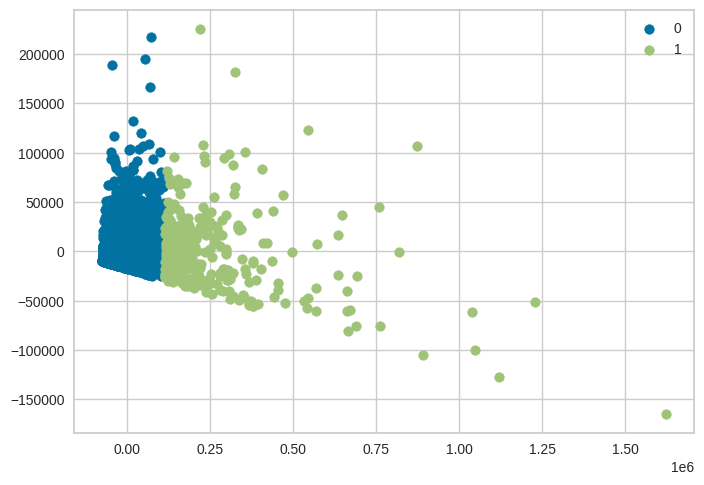

In [121]:
#viualizing cluster
from sklearn.decomposition import PCA

pca = PCA(2)

#Transform the data
df_minmax1 = pca.fit_transform(df_minmax)

#Initialize the class object
kmeans = KMeans(n_clusters= 2)

#predict the labels of clusters.
label = kmeans.fit_predict(df_minmax1 )

#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(df_minmax1 [label == i , 0] , df_minmax1[label == i , 1]  , label = i)
plt.legend()
plt.show()

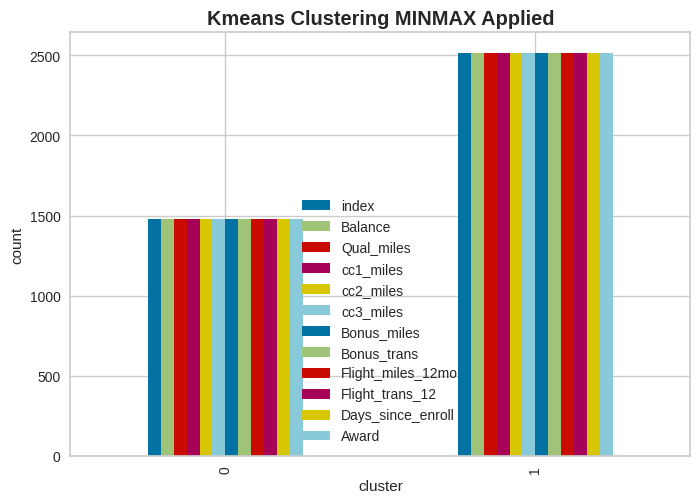

In [122]:
df_minmax.groupby(['Kmeans_label']).count().plot(kind='bar')
plt.title('Kmeans Clustering MINMAX Applied',fontsize='large',fontweight='bold')
plt.xlabel('cluster')
plt.ylabel('count')
plt.show()

DBSCAN - Density Based Spatial Clustering

In [123]:
#STEP 1 - finding optimal value of EPS and MinPOINT

# eps values to be investigated
eps_values = np.arange(0.15,4,0.25)

# min_samples values to be investigated
#minpoint >=3
min_samples = np.arange(3,30)

DBSCAN_params = zip(eps_values, min_samples)

In [124]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1 
min_sample= 11 
number of clusters= 2 
average silhouette score= 0.4702


In [125]:
dbscan1 = DBSCAN(eps=1, min_samples=11)
dbscan1.fit(minmax_df)

DBSCAN(eps=1, min_samples=11)

In [126]:
#model analysis
dbscan1.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [127]:
df_dbscan1=data.copy()
df_dbscan1['DBSCAN_labels'] = dbscan1.labels_
df_dbscan1.head()

,index,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,DBSCAN_labels
0,0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


<Axes: xlabel='DBSCAN_labels'>

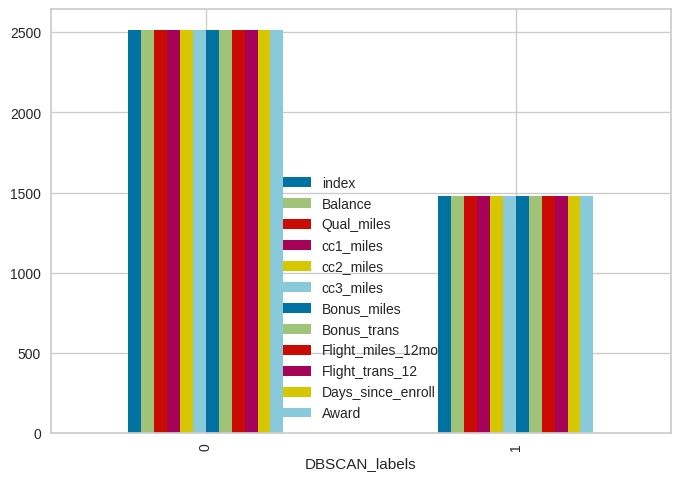

In [128]:
# Plotting barplot

df_dbscan1.groupby(['DBSCAN_labels']).count().plot(kind='bar')

Hierarchical Clustering Algorithm

In [129]:
n_clusters = [2,3,4,5,6,7,8]

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
      #model let h1
        h2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages)

      #fitting standard scaled data first
        h2_labels = h2.fit_predict(minmax_df)
        silhouette_score2 = sil(minmax_df, h2_labels)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.47015068065667365
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4676119194657775
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4356303838699111
For n_clusters = 2 The average silhouette_score with linkage- single : 0.47015068065667365

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.34339423468951796
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.46579905132223803
For n_clusters = 3 The average silhouette_score with linkage- average : 0.4682967187002398
For n_clusters = 3 The average silhouette_score with linkage- single : 0.46938974766481717

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.32614829365576986
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.41216943125379024
For n_clusters = 4 The average silhouette_score with linkage- average : 0.438331819109805

conlsution : lets choose clster no =2 with ward linkage

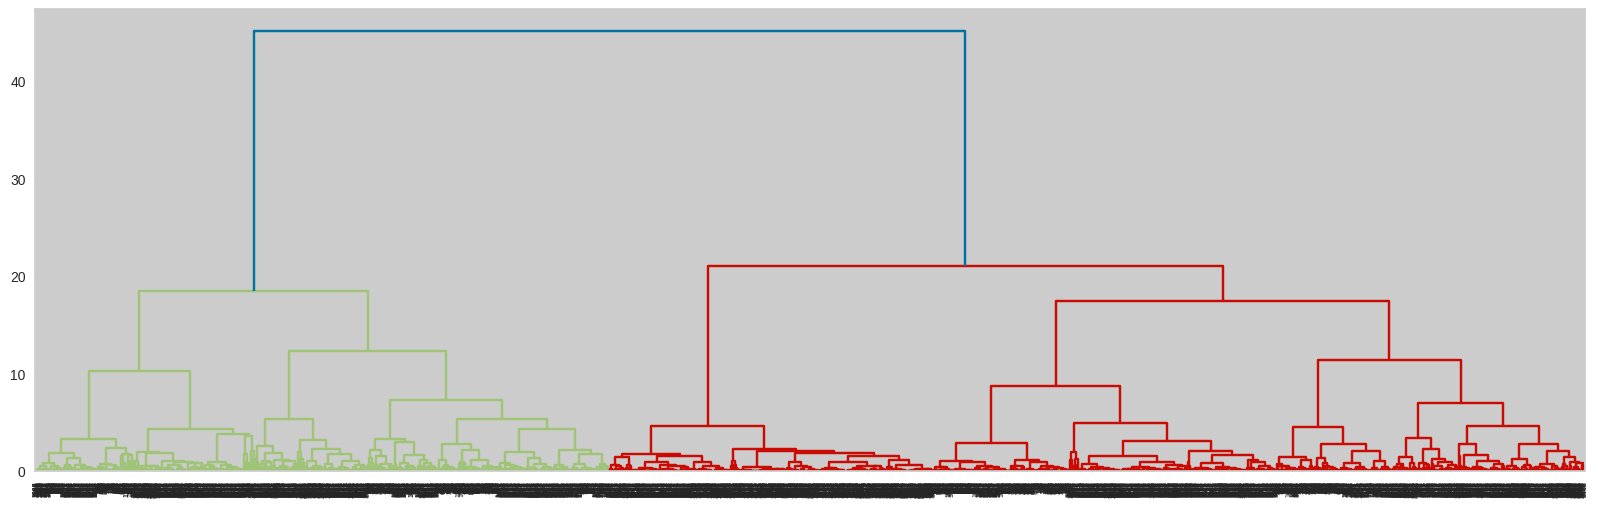

In [130]:
#visulaizing dendogram
plt.figure(figsize =(20, 6))
sch.dendrogram(sch.linkage(minmax_df, method ='ward',optimal_ordering=False))
plt.show()

In [131]:
#building model
h2 = AgglomerativeClustering(n_clusters=2,linkage='ward')
 #fitting standard scaled data first
h2_labels = h2.fit_predict(minmax_df)

In [132]:
# putting labels with main dataset copy
df_h2=data.copy()

df_h2['Hierarchical_labels'] = h2.labels_
df_h2.head()

,index,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical_labels
0,0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


<Axes: xlabel='Hierarchical_labels'>

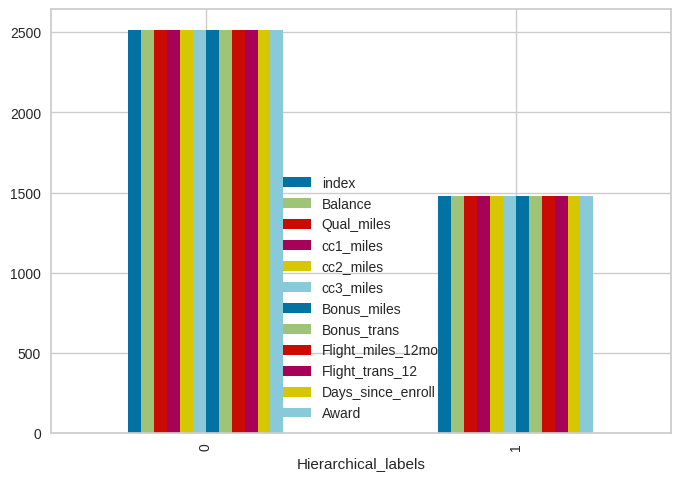

In [133]:
# Plotting barplot
df_h2.groupby(['Hierarchical_labels']).count().plot(kind='bar')

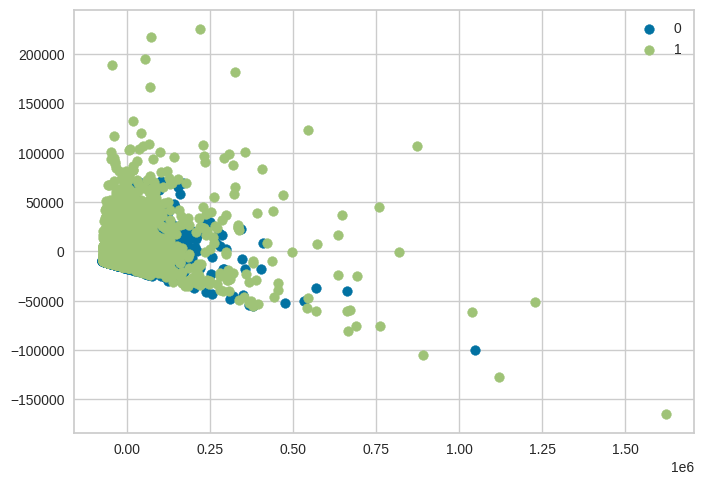

In [134]:
#viualizing cluster

pca = PCA(2)

#Transform the data
df_minmax1 = pca.fit_transform(df_minmax)

#Initialize the class object
h = AgglomerativeClustering(n_clusters=2,linkage='ward')
 #fitting standard scaled data first
h.fit_predict(minmax_df)

#predict the labels of clusters.
label = h.labels_

#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(df_minmax1 [label == i , 0] , df_minmax1[label == i , 1]  , label = i)
plt.legend()
plt.show()

In [135]:
df_dbscan1.head()

,index,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,DBSCAN_labels
0,0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


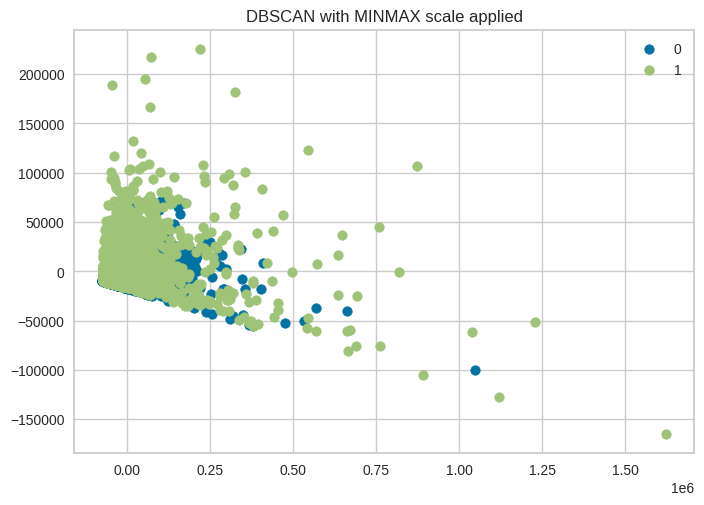

In [138]:
#viualizing cluster

pca = PCA(2)

#Transform the data
df_minmax1 = pca.fit_transform(df_minmax)

#Initialize the class object
dbscan = DBSCAN(eps=1, min_samples=11)
dbscan.fit(minmax_df)

#predict the labels of clusters.
label = dbscan.labels_

#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(df_minmax1 [label == i , 0] , df_minmax1[label == i , 1]  , label = i)
plt.legend()
plt.title('DBSCAN with MINMAX scale applied')
plt.show()